<a href="https://colab.research.google.com/github/fogoke123/Python-Fundamental/blob/main/Page_Views_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Discovery project - page views**###



In this project I will analize the page views on the freeCodeCamp.org forum between 2016-05-09 and 2019-12-03. The project was adapted Adapted from freeCodeCamp [project](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer) The essence of the project is to understand the pattern of visits to the forum and identify growth over various time ranges e.g yearly and monthly. We will make use of Matplotlib and seaborn packages to create various type of charts and box plots visualisations that will help aid our understanding of the pattern of visit.  




The dataset can be read from here: "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"





### Import dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03

In [ ]:
from scipy.stats.morestats import Mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# The dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03
def visualise_data():
  raw_data = pd.read_csv("https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv")
  raw_data.info()
  raw_data.date = pd.to_datetime(raw_data.date)
  print(raw_data)
  print(raw_data.isnull().values.any())
  print(raw_data.info())
  return raw_data

raw_data = visualise_data()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB
           date   value
0    2016-05-09    1201
1    2016-05-10    2329
2    2016-05-11    1716
3    2016-05-12   10539
4    2016-05-13    6933
...         ...     ...
1299 2019-11-29  171584
1300 2019-11-30  141161
1301 2019-12-01  142918
1302 2019-12-02  220144
1303 2019-12-03  158549

[1304 rows x 2 columns]
False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1304 non-null   datetime64[ns]
 1   value   1304 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 20.5 KB
None


The dataset has been successfully imported. It's a csv file stored in a variable called raw_data . Using the .info() we can see all the details about the dataset. Like the number of columns and rows, non-null, null and datatypes of each columns. 

###**Create a line plot**###

To enable me create a line plot, I will do the following

convert the date column to datetime type

*   convert the date column to datetime type
*   create 3 new columns for year, month and day (use dt.year, dt.strftime to get the month name, dt.day)

*   set the index to the date column.
*   clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset






             value     month       day  year
date                                        
2016-05-19   19736       May  Thursday  2016
2016-05-26   18060       May  Thursday  2016
2016-05-27   19997       May    Friday  2016
2016-05-28   19044       May  Saturday  2016
2016-05-29   20325       May    Sunday  2016
...            ...       ...       ...   ...
2019-11-24  138875  November    Sunday  2019
2019-11-29  171584  November    Friday  2019
2019-11-30  141161  November  Saturday  2019
2019-12-01  142918  December    Sunday  2019
2019-12-03  158549  December   Tuesday  2019

[1238 rows x 4 columns]


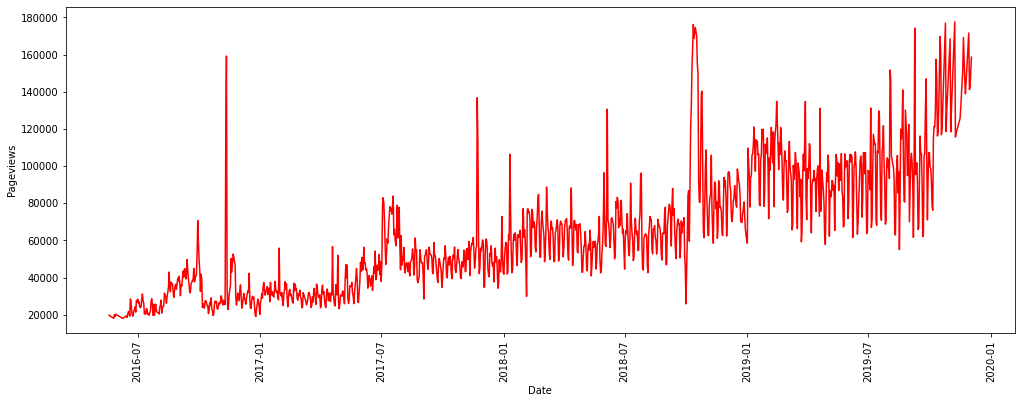

<Figure size 5760x720 with 0 Axes>

In [ ]:
def line_plot():
  # Converting "date" column to datetime type
  raw_data = pd.read_csv("https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv")
  raw_data.date = pd.to_datetime(raw_data.date)
  
  #create 3 new columns for year, month and day (use dt.year, dt.strftime to get the month name, dt.day)
  raw_data['month'] = raw_data['date'].dt.month_name()
  raw_data['day'] = raw_data['date'].dt.day_name()
  raw_data['year'] = pd.DatetimeIndex(raw_data['date']).year
  date_index = raw_data.set_index('date')
  
  # Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset
  f25 = date_index['value'] <= date_index['value'].quantile(0.025)
  f75 = date_index['value'] >= date_index['value'].quantile(0.975)
  cond = (f25 | f75)
  date_index = date_index.drop(index=date_index[cond].index)
  raw_data = date_index
  print(raw_data)
  
  
  #Draw a line plot
  
  f = plt.figure()
  f.set_figwidth(17)
  f.set_figheight(6)
  plt.plot(date_index.index, date_index['value'], linestyle="solid", marker=None, color="red")
  plt.xticks(rotation=90)
  plt.xlabel('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
  plt.xlabel('Date') and plt.ylabel('Pageviews')
  f = plt.figure()
  f.set_figwidth(80)
  f.set_figheight(10)
  plt.show()
  return raw_data


 
  

raw_data = line_plot()

Looking at the original dataset and what it is now you can see

The date column to datetime type, three new additional columns was added, year, month and day. The index was set to date column, the was then cleaned by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset



###**Create a bar plot**###

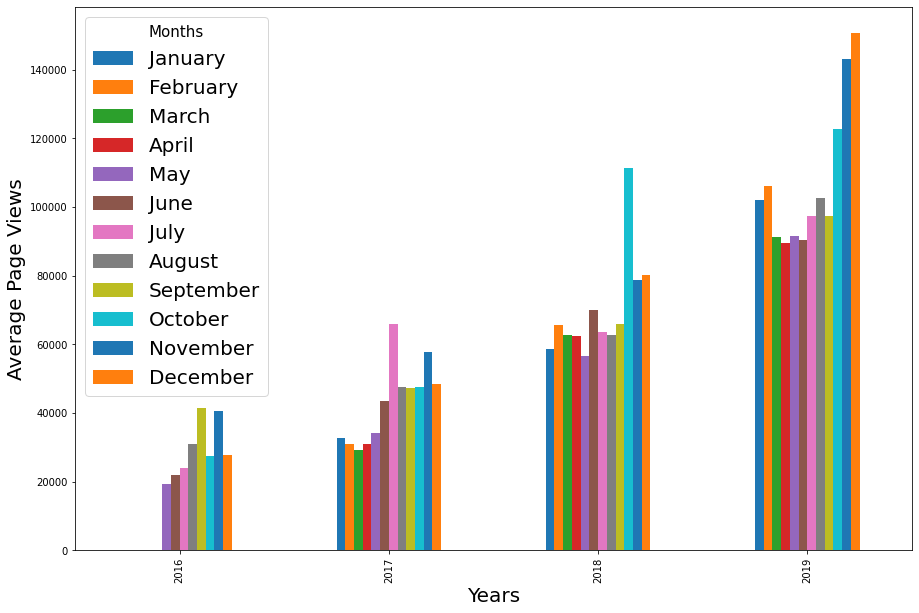

In [ ]:
from scipy.stats.morestats import Mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def bar_plot():

  raw_data['Year'] = pd.DatetimeIndex(raw_data.index).year
  raw_data['Month'] = pd.DatetimeIndex(raw_data.index).month

  bar_plot = raw_data.groupby(['Year', 'Month'])['value'].mean()
  bar_plot = bar_plot.unstack()
  month_names=['January', 'February', 'March', 'April', 'May', 'June', 'July', 
             'August', 'September', 'October', 'November', 'December']
  # Draw bar plot
  bar_plot.plot(kind= 'bar', figsize = (15,10))

  plt.title('')
  plt.xlabel('Years',fontsize = 20)
  plt.ylabel('Average Page Views',fontsize = 20)
  lg = plt.legend(title= 'Months', fontsize = 20, labels = month_names)
  title = lg.get_title()
  title.set_fontsize(15)
  
  
 
bar_plot()

###**A set of box plots** ###

Text(0, 0.5, 'Page Views')

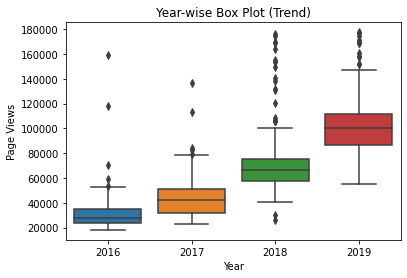

In [ ]:
from scipy.stats.morestats import Mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def bar_plot_1():
  plt1 =sns.boxplot(x = "Year", y = "value", data = raw_data)
  plt1.set_title("Year-wise Box Plot (Trend)")
  plt1.set_xlabel('Year')
  plt1.set_ylabel('Page Views')

bar_plot_1()

Text(0, 0.5, 'Page Views')

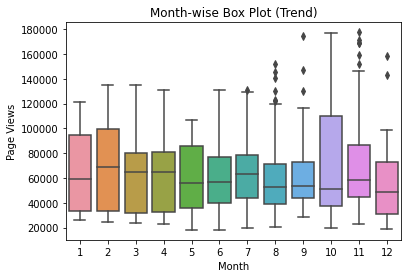

In [ ]:
from scipy.stats.morestats import Mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def bar_plot_2():


  plt2=sns.boxplot(x='Month',y='value',data=raw_data)
  plt2.set_title("Month-wise Box Plot (Trend)")
  plt2.set_xlabel('Month')
  plt2.set_ylabel('Page Views')

bar_plot_2()

###4.  predict the number of page views in the year 2020 based on the data up to 2019
---

*  perform a linear regression and create a line of best fit 
*  predict the page views in the year 2020, 2025 and 2030 if identified trends persist. 


slope:  2.5805462720784877e-05 
yint: 2015.9938668726852 
rsquared:  0.6292795579214121 
pval:  1.3395933130147786e-268
slope yint


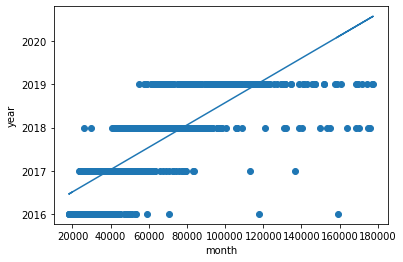

In [ ]:
from scipy.stats import linregress
from scipy.stats.morestats import Mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x = raw_data['value']
y = raw_data['year']
regression = linregress(x,y)
slope = regression.slope
yint = regression.intercept
intercept = regression.intercept
rsquared = (regression.rvalue)**2
pval = regression.pvalue
plt.plot(x, slope*x + intercept)
plt.scatter(x,y)
plt.xlabel('month') and plt.ylabel('year')
print("slope: ",slope,"\nyint:",yint,"\nrsquared: ",rsquared,"\npval: ",pval)
print('slope','yint')






It was a difficult exercise, overall was an exciting opportunity to see how you can extract days using datetime. 

###**What caused the biggest problems?**### 
At the time of working on this project, the challenge was creating new columns using dt.year, dt.strftime to get the month name, dt.day to get the exact day, month and year. 
###**How did you solve these problems?**### 
I made use of available resources online and with the help of my tutors. 